In [1]:
def evencliffordprolatematrix(k,c,m):
    M=matrix(CC,m)
    M[0,0]=(4*(math.pi)**2)*(c**2)*(k+1)/(k+2)
    for i in range(m-1): 
        M[i+1,i]=-(4*(pi)**2)*(c**2)*((i+1)*(k+i+1))/((k+2*i+2)*sqrt((k+2*i+3)*(k+2*i+1)))
    for i in range(m-1):
        M[i+1,i+1]=4*(i+1)*(k+i+2)+4*((pi)**2)*(c**2)*((((i+k+2)**2)/((2*i+k+4)*(2*i+k+3)))+(((i+1)**2)/((2*i+k+2)*(2*i+k+3))))
    for i in range(m-1):
        M[i,i+1]=-(4*(pi)**2)*(c**2)*((i+1)*(k+i+1))/((k+2*i+2)*sqrt((k+2*i+3)*(k+2*i+1)))
    return M

In [2]:
n(evencliffordprolatematrix(1,1,4))

[ 26.3189450695716 -9.30515226618517 0.000000000000000 0.000000000000000]
[-9.30515226618517  33.0551560556573 -9.67019789831844 0.000000000000000]
[0.000000000000000 -9.67019789831844  52.3031861965267 -9.76837501330981]
[0.000000000000000 0.000000000000000 -9.76837501330981  80.0525295768165]

In [3]:
import numpy as np
def evencoefficientcliffordprolate(k, c, m, n):
    A = np.array(evencliffordprolatematrix(k, c, m), dtype=np.complex128)  # Convert to NumPy array
    eigenvalues, eigenvectors = np.linalg.eig(A)  # Compute eigenvalues and eigenvectors
    return eigenvectors[:, n]  # Return nth eigenvector


In [4]:
evencoefficientcliffordprolate(1,1,4,1)

array([-0.6309736 +0.j,  0.63928496+0.j,  0.42922211-0.j,  0.09463313-0.j])

In [5]:
def evencliffordlegendrewithoutyk(r, N, k):
    if N == 0:
        C = (r^k) / sqrt(2 * pi)
    else:
        prefactor = ((2^(2*N)) * gamma(2*N + 1)) / gamma(N + 1)
        C = prefactor * ((gamma(k + N + 1) / gamma(k + 1)) * ((r^k) / sqrt(2 * pi)))
        
        for i in range(1, N + 1):
            C += prefactor * (binomial(N, i) * ((gamma(i + k + N + 1) / gamma(i + k + 1))) *
                              (-1)**i * (1 / sqrt(2 * np.pi)) * (r^(2*i + k)))
    
    D = (np.sqrt(2*k + 4*N + 2) / (2^(2*N) * gamma(2*N+1))) * C
    return D

In [6]:
n(evencliffordlegendrewithoutyk(0.5, 4, 3))

0.101155988792405

In [7]:
def evencomputemultiprolatewithoutyk(r, k, c, m, n):
    G = 0.0
    N = evencoefficientcliffordprolate(k, c, m , n)  
    for j in range(m):
            G += N[j] * evencliffordlegendrewithoutyk(r, j, k)  
    return G


In [8]:
n(evencomputemultiprolatewithoutyk(0.43, 1, 1, 40, 0))

0.825885495759374

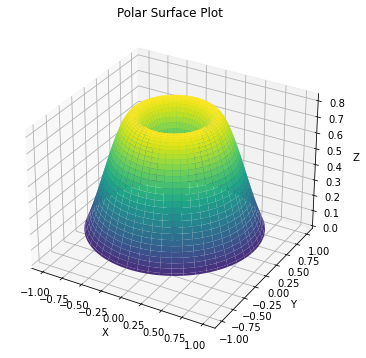

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
k = 1
c = 1
m = 40
n = 0

# Define the polar grid
r = np.linspace(0, 1, 100)  # Radius from 0 to 1
theta = np.linspace(0, 2 * np.pi, 100)  # Angle from 0 to 2π
R, T = np.meshgrid(r, theta)

# Convert polar to Cartesian coordinates
X = R * np.cos(T)
Y = R * np.sin(T)

# Compute function values
Z = evencomputemultiprolatewithoutyk(R, k, c, m, n)

# Create surface plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Polar Surface Plot")

plt.show()


In [10]:
from sage.all import *

# Define the function for the odd Clifford prolate matrix
def oddcliffordprolatematrix(k, c, m):
    M = Matrix(CC, m)  # Initialize an m x m matrix with integer entries (ZZ for integer domain)

    for i in range(m - 1):
        M[i, i + 1] = -(4 * pi^2) * (c^2) * ((i + 1) * (k + i + 2)) / ((k + 2 * (i + 1) + 1) * sqrt((k + 2 * (i + 1) + 2) * (k + 2 * (i + 1))))

    for i in range(m):
        M[i, i] = (4 * (i + 1) * (k + i + 1) +
                   4 * pi^2 * (c^2) * (((i + k + 1)^2) / ((2 * (i + 1) + k - 1) * (2 * (i + 1) + k)) +
                                        ((i + 1)^2) / ((2 * (i + 1) + k + 1) * (2 * (i + 1) + k))))

    for i in range(m - 1):
        M[i + 1, i] = -(4 * pi^2) * (c^2) * ((i + 1) * (k + i + 2)) / ((k + 2 * (i + 1) + 1) * sqrt((k + 2 * (i + 1) + 2) * (k + 2 * (i + 1))))

    return M


In [11]:
n(oddcliffordprolatematrix(2,2,4))

[ 138.330936333944 -25.7871943955158 0.000000000000000 0.000000000000000]
[-25.7871943955158  131.260021405242 -32.5612500443660 0.000000000000000]
[0.000000000000000 -32.5612500443660  150.236383095674 -35.3105701629870]
[0.000000000000000 0.000000000000000 -35.3105701629870  182.134729318598]

In [12]:
import numpy as np
def oddcoefficientcliffordprolate(k, c, m, n):
    A = np.array(oddcliffordprolatematrix(k, c, m), dtype=np.complex128)  # Convert to NumPy array
    eigenvalues, eigenvectors = np.linalg.eig(A)  # Compute eigenvalues and eigenvectors
    return eigenvectors[:, n]  # Return nth eigenvector


In [13]:
oddcoefficientcliffordprolate(2,2,4,0)

array([0.40260228+0.j, 0.71506534+0.j, 0.53168888+0.j, 0.20952303+0.j])

In [14]:
def oddcliffordlegendrewithoutyk(r, N, k):
    if N==0:
        C=-2*((r^(k+1))/(sqrt(2*np.pi)))
    else:
        C=-((((2^((2*N)+1)))*gamma((2*N)+2))/(gamma(N+1)))*(gamma(k+N+2)/(gamma(k+2))*(((r^(k+1))/(sqrt(2*pi)))))
        for i in range(1, N + 1):
            C=C-((((2^((2*N)+1)))*gamma((2*N)+2))/(gamma(N+1)))*((binomial(N,i)*((gamma(i+k+N+2))/(gamma(i+k+2)))*((-1)^(i))*(1/(sqrt(2*(np.pi))))*(r^(2*i+k+1))))
    D=(sqrt((2*k)+(4*N)+4)/(2^(2*N+1)*gamma(2*N+2)))*C
    return D

In [15]:
n(oddcliffordlegendrewithoutyk(0.5, 2, 1))

-0.723029144393349

In [16]:
def oddcomputemultiprolatewithoutyk(r, k, c, m, n):
    G = 0.0
    N = oddcoefficientcliffordprolate(k, c, m , n)  
    for j in range(m):
            G += N[j] * oddcliffordlegendrewithoutyk(r, j, k)  
    return G

In [17]:
n(oddcomputemultiprolatewithoutyk(0.43, 1, 1, 20, 0))

-0.547873276455095

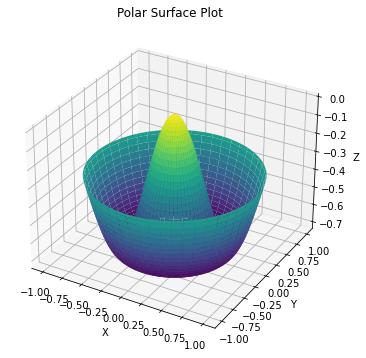

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
k = 1
c = 1
m = 40
n = 0

# Define the polar grid
r = np.linspace(0, 1, 100)  # Radius from 0 to 1
theta = np.linspace(0, 2 * np.pi, 100)  # Angle from 0 to 2π
R, T = np.meshgrid(r, theta)

# Convert polar to Cartesian coordinates
X = R * np.cos(T)
Y = R * np.sin(T)

# Compute function values
Z = oddcomputemultiprolatewithoutyk(R, k, c, m, n)

# Create surface plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Polar Surface Plot")

plt.show()


In [19]:
from sage.all import *

# Define parameters
k = 1
c = 1
m = 40
n = 0

# Convert polar to Cartesian coordinates and define function for 3D plot
def f(x, y):
    r = sqrt(x^2 + y^2)
    theta = atan2(y, x)
    return evencomputemultiprolatewithoutyk(r, k, c, m, n)

# Create 3D plot using SageMath syntax with color bar
P = plot3d(f, (-2, 2), (-2, 2), adaptive=True,
           color=rainbow(60, 'rgbtuple'), max_bend=0.1, max_depth=15, colorbar=True)

P.show()


TypeError: '>' not supported between instances of 'complex' and 'complex'

In [ ]:
from sage.all import *

# Define the even Clifford Legendre radial part function
def evencliffordlegendreradialpart(r, N, k):
    if N == 0:
        C = 1
    else:
        prefactor = ((2^(2 * N)) * gamma(2 * N + 1)) / gamma(N + 1)
        C = prefactor * (gamma(k + N + 1) / gamma(k + 1))
        
        for i in range(1, N + 1):
            C += prefactor * (binomial(N, i) * ((gamma(i + k + N + 1) / gamma(i + k + 1))) *
                              (-1)^i * (r^(2 * i)))
    
    D = (sqrt(2 * k + 4 * N + 2) / (2^(2 * N) * gamma(2 * N + 1))) * C
    return D

In [ ]:
n(evencliffordlegendreradialpart(0.24, 2, 3))

In [ ]:
from sage.all import *

# Define the odd Clifford Legendre radial part function
def oddcliffordlegendreradialpart(r, N, k):
    if N == 0:
        C = -2
    else:
        C = -((((2^((2 * N) + 1))) * gamma((2 * N) + 2)) / gamma(N + 1)) * (gamma(k + N + 2) / gamma(k + 2))
        for i in range(1, N + 1):
            C -= ((((2^((2 * N) + 1))) * gamma((2 * N) + 2)) / gamma(N + 1)) * (binomial(N, i) * ((gamma(i + k + N + 2) / gamma(i + k + 2))) * (-1)^i * (r^(2 * i)))
    
    D = (sqrt(2 * k + 4 * N + 4) / (2^(2 * N + 1) * gamma(2 * N + 2))) * C
    return D


In [ ]:
n(oddcliffordlegendreradialpart(0.24, 2, 3))

In [ ]:
def evencomputemultiprolateradialpart(r, k, c, m, n):
    G = 0.0
    N = evencoefficientcliffordprolate(k, c, m , n)  
    for j in range(m):
            G += N[j] * evencliffordlegendreradialpart(r, j, k)  
    return G

In [ ]:
n(evencomputemultiprolateradialpart(0,1,2,20,0))

In [ ]:
def oddcomputemultiprolateradialpart(r, k, c, m, n):
    G = 0.0
    N = oddcoefficientcliffordprolate(k, c, m , n)  
    for j in range(m):
            G += N[j] * oddcliffordlegendreradialpart(r, j, k)  
    return G

In [ ]:
n(oddcomputemultiprolateradialpart(0.6, 1, 1, 20, 0))

In [ ]:
def evenquatientFourieronprolateatzero(n, k, c, m):
    N = evencoefficientcliffordprolate(k, c, m, n)
    q = -1.0 * N[0] * sqrt(2 * k + 2) * (pi^(k + 1)) * (c^k) * (1j^k) / (gamma(k + 2) * evencomputemultiprolateradialpart(0, k, c, m, n))
    return q

In [ ]:
n(evenquatientFourieronprolateatzero(0,2,2,20))

In [ ]:
def oddquatientFourieronprolateatzero(n, k, c, m):
    N = oddcoefficientcliffordprolate(k, c, m, n)  # Assuming this function is defined
    q = (N[0] * sqrt(2*k + 4) * pi^(k + 2) * c^(k + 1) * (1j)^(k + 1)) / (
        gamma(k + 3) * oddcomputemultiprolateradialpart(0, k, c, m, n)
    )
    return q

In [ ]:
result = oddquatientFourieronprolateatzero(1, 1, 1, 20)
abs(n(result))

In [ ]:
def Plotting_Eigenvalues_CPSWFs(k,c,m,number_eigenvalues):
    T=[]
    for i in range(number_eigenvalues+1):
        A=evenquatientFourieronprolateatzero(i, k, c, m)
        B=oddquatientFourieronprolateatzero(i, k, c, m)
        T.append(abs(n(A)))
        T.append(abs(n(B)))
    return T

In [ ]:
A=Plotting_Eigenvalues_CPSWFs(1,1,20,5)
plot(A)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot setup
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Plot the data for different k values
plt.plot(Plotting_Eigenvalues_CPSWFs(0, 1, 40, 5), label="k=0, c=1")
plt.plot(Plotting_Eigenvalues_CPSWFs(1, 1, 40, 5), label="k=1, c=1")
plt.plot(Plotting_Eigenvalues_CPSWFs(2, 1, 40, 5), label="k=2, c=1")

# Add grid, legend, and display the plot
plt.title("Plotting Eigenvalues of COSWFs When n Changes", fontsize=14)
plt.grid()
plt.legend()
plt.show()
